# Fuzzy logic to measure the degree of compliance with a target in an SGD: The case of SDG 11
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/marialonsogar/fuzzy-compliance-SDG11/blob/main/fuzzy-sdg11/fuzzy-system-demo.ipynb)



# TODO: intro <a class="anchor" id="introduction"></a>

# Table of contents
* [1. Introduction](#introduction)
  * [1.1 Requirements](#requirements)
* [2. Methodology](#chapter2)
  * [1.1. Identification](#chapter2_1)
  * [1.2. Fuzzification](#chapter2_2)
  * [1.3. Rules](#chapter2_3)
  * [1.4. Defuzzification](#chapter2_4)
* [6. Build Fuzzy Inference System (FIS)](#chapter6)
  * [6.1 Results](#chapter6_1)
  * [6.2 Comparison](#chapter6_2)
* [Summary](#summary)
* [Session info](#session_info)

# Requirements <a class="anchor" id="requirements"></a>

In [1]:
import zadeh
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

# class to build fuzzy inference system
from VariableFIS import VariableFIS


# set default matplotlib config
plt.rcParams['figure.figsize'] = [5, 3]
plt.rcParams['figure.dpi'] = 100
mpl.rcParams['lines.linewidth'] = 0.9
plt.style.use('ggplot')
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["green", "yellow", "orange", "red"]) 
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 8

In [2]:
# path to save the plots
images_path = '..\doc\images'

# Methodology <a class="anchor" id="chapter2"></a>

The following figure represents the algorithm of building the fuzzy inference model:

<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" version="1.1" width="1031px" height="461px" viewBox="-0.5 -0.5 1031 461" content="&lt;mxfile&gt;&lt;diagram id=&quot;w_HVBN4PYonU5akOGSFt&quot; name=&quot;Página-1&quot;&gt;7VrbcqM4EP0aP3qKi8H4MXacTGoyVanJ7uRxSwZhNBGIFfItX78tEAYsfJkMXnuzU3FVTEsg9TndR2rhnj2J1/ccpdFXFmDas4xg3bNve5ZlGgMH/knLprCMRqPCMOckUJ0qwzN5w+WdyrogAc4aHQVjVJC0afRZkmBfNGyIc7ZqdgsZbY6aorka0agMzz6iWOv2QgIRFVbPGlb2z5jMo3Jk01X+zZD/OudskajxepZt5H9Fc4zKZ6lxswgFbFUz2dOePeGMieJbvJ5gKrEtYSvuu9vTup03x4k45QaP2qOpjZbB3V/ey99Z/PLjC+5bxVOWiC5w6UY+WbEpAcIB4KUuGRcRm7ME0WllHecgYDmMAVdVn0fGUjCaYPyBhdgo8tFCMDBFIqaqVXdFeZexBffVPNB99N2NSf/PbPnlhtOVZ3welPMXiM+xOOCnep70pTaAAuoesxgLvoEOHFMkyLIZG0iF2Hzbr4IZviik21E/NOsa6g8BuE5C4sPoLNE4yFYkpiiRYIcsESUdEjs/IjR4RBu2kP5nAqKyvBpHjJM36I9KoKGZC0WDbTR6PMs7FYUcZ9DnqeTD3DF9RetGx0eUCWXwGaUozchsO78YqCHJmAnBYtUpJJROGGU8d84Ow9Dy/Xx2nL3iWkvgzlzHPRQgS8wFXh+ktGwt81DpVN9V16sq682BskW1jB8ZZ4oCW4uC74gTBNBlWgCAk0JDKGFFRNTgVCZEyTyBSx/wwmAfS5wguOiNaohJEOS5m6XIJ8n8EYfS3UFl+aYQkCYGt4c0F68IbsTwhHHKSCJySJwxfACkifHJ6Tkw2wlcm9U1fGR3LiYsAQcQyTnEEDQrLAMH9EMggYqQMVrZPphFx0NAUW6fyLh9LsYHGuMTToAggn4Tfg7CT03xsxHuaoTfLd7e5AwfkhCDu7C4WcbzJhM4Pij6TcUMEPbCVsV0fQ/Pwm4Us78rmaah4+narXh2AGj7Oq6n0HVsWA7RX9/FtHpln7qLsbvexuS33nCONrUOKtOrJz9JQ20pNZxGXJR7+YrY4okVzdupvZ95fbWUqbR/y1RxLAlbRaCzzyB0snUFlUyTzy7y66AAnJx0gya0ptkiYVZLyrnnyjhdwm5x+CGRd68NelPH/gOInXOq2DlXIXaOdQGxczTia/uFj5FulrOTbt7F0234EdPNOzHdOs+2X+LC06j4tqA4P3XLuk2Bd50+nCcFBhfPAH2TpWGdRSjNgUWbXDolcq9Y+JGK+KyIa7esGDGfLnFROJpaFXl7QJLys6VakbhbNKZQN4PbstpVZe9TZRlnCUr/YIWWl2df+ySuGT5nY9veEbyRTndbcTo4G9v6KvOb7a7YdnZqJNO5NNu6pJZnESRJF6Js2nv2WJPQ7k+l2jS7uZKejajhp50NnqUzNXJ0pro4NGpnarSXKbYQ/2Oqdiu0yzN1eQHdbl/OLqDb7VD9DZTR9lJJ5//n39YMm0ePLcXBv6ueJ1B9LS9KWx1QmnK0DOj8hPGXYNeVcMJJlh5fs5pI/2xFgN09FcFwNDM6ivD+9pB852Dhgtt/Yy/cxxae68fbGV4d3NZ/XFPcEzWlRPpKRMXSw/xBrocpx0KdaBsoCYoeJDj6i4xmQbFb4DjYCwZtwe1ZM9vt6McNjt0M7rY3dZbREtzveVMHl9WvlooTz+qnYfb0Hw==&lt;/diagram&gt;&lt;/mxfile&gt;" style="background-color: rgb(3, 3, 3);"><defs><clipPath id="mx-clip-424-30-132-30-0"><rect x="424" y="30" width="132" height="30"/></clipPath><clipPath id="mx-clip-424-60-132-30-0"><rect x="424" y="60" width="132" height="30"/></clipPath></defs><g><path d="M 490 90 L 490 153.63" fill="none" stroke="rgb(0, 0, 0)" stroke-miterlimit="10" pointer-events="stroke"/><path d="M 490 158.88 L 486.5 151.88 L 490 153.63 L 493.5 151.88 Z" fill="rgb(0, 0, 0)" stroke="rgb(0, 0, 0)" stroke-miterlimit="10" pointer-events="all"/><path d="M 420 30 L 420 0 L 560 0 L 560 30" fill="#fff2cc" stroke="#d6b656" stroke-miterlimit="10" pointer-events="all"/><path d="M 420 30 L 420 90 L 560 90 L 560 30" fill="none" stroke="#d6b656" stroke-miterlimit="10" pointer-events="none"/><path d="M 420 30 L 560 30" fill="none" stroke="#d6b656" stroke-miterlimit="10" pointer-events="none"/><g fill="rgb(0, 0, 0)" font-family="Helvetica" font-weight="bold" pointer-events="none" text-anchor="middle" font-size="12px"><text x="489.5" y="19.5">Identification</text></g><g fill="rgb(0, 0, 0)" font-family="Helvetica" pointer-events="none" clip-path="url(#mx-clip-424-30-132-30-0)" text-anchor="middle" font-size="12px"><text x="489.5" y="49.5">Variables</text></g><g fill="rgb(0, 0, 0)" font-family="Helvetica" pointer-events="none" clip-path="url(#mx-clip-424-60-132-30-0)" text-anchor="middle" font-size="12px"><text x="489.5" y="79.5">Criteria</text></g><path d="M 180 183 L 180 160 L 810 160 L 810 183" fill="#dae8fc" stroke="#6c8ebf" stroke-miterlimit="10" pointer-events="none"/><path d="M 180 183 L 180 460 L 810 460 L 810 183" fill="none" stroke="#6c8ebf" stroke-miterlimit="10" pointer-events="none"/><path d="M 180 183 L 810 183" fill="none" stroke="#6c8ebf" stroke-miterlimit="10" pointer-events="none"/><g fill="rgb(0, 0, 0)" font-family="Helvetica" font-weight="bold" pointer-events="none" text-anchor="middle" font-size="12px"><text x="494.5" y="176">Fuzzy Inference System</text></g><path d="M 285 330 L 285 370 L 428.63 370" fill="none" stroke="rgb(0, 0, 0)" stroke-miterlimit="10" pointer-events="none"/><path d="M 433.88 370 L 426.88 373.5 L 428.63 370 L 426.88 366.5 Z" fill="rgb(0, 0, 0)" stroke="rgb(0, 0, 0)" stroke-miterlimit="10" pointer-events="none"/><rect x="225" y="270" width="120" height="60" rx="9" ry="9" fill="#dae8fc" stroke="#6c8ebf" pointer-events="none"/><g transform="translate(-0.5 -0.5)"><switch><foreignObject pointer-events="none" width="100%" height="100%" requiredFeatures="http://www.w3.org/TR/SVG11/feature#Extensibility" style="overflow: visible; text-align: left;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: flex; align-items: unsafe center; justify-content: unsafe center; width: 118px; height: 1px; padding-top: 300px; margin-left: 226px;"><div data-drawio-colors="color: rgb(0, 0, 0); " style="box-sizing: border-box; font-size: 0px; text-align: center;"><div style="display: inline-block; font-size: 12px; font-family: Helvetica; color: rgb(0, 0, 0); line-height: 1.2; pointer-events: none; white-space: normal; overflow-wrap: normal;">Fuzzification</div></div></div></foreignObject><text x="285" y="304" fill="rgb(0, 0, 0)" font-family="Helvetica" font-size="12px" text-anchor="middle">Fuzzification</text></switch></g><rect x="645" y="270" width="120" height="60" rx="9" ry="9" fill="#dae8fc" stroke="#6c8ebf" pointer-events="none"/><g transform="translate(-0.5 -0.5)"><switch><foreignObject pointer-events="none" width="100%" height="100%" requiredFeatures="http://www.w3.org/TR/SVG11/feature#Extensibility" style="overflow: visible; text-align: left;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: flex; align-items: unsafe center; justify-content: unsafe center; width: 118px; height: 1px; padding-top: 300px; margin-left: 646px;"><div data-drawio-colors="color: rgb(0, 0, 0); " style="box-sizing: border-box; font-size: 0px; text-align: center;"><div style="display: inline-block; font-size: 12px; font-family: Helvetica; color: rgb(0, 0, 0); line-height: 1.2; pointer-events: none; white-space: normal; overflow-wrap: normal;">Defuzzification</div></div></div></foreignObject><text x="705" y="304" fill="rgb(0, 0, 0)" font-family="Helvetica" font-size="12px" text-anchor="middle">Defuzzification</text></switch></g><path d="M 555 370 L 705 370 L 705 336.37" fill="none" stroke="rgb(0, 0, 0)" stroke-miterlimit="10" pointer-events="none"/><path d="M 705 331.12 L 708.5 338.12 L 705 336.37 L 701.5 338.12 Z" fill="rgb(0, 0, 0)" stroke="rgb(0, 0, 0)" stroke-miterlimit="10" pointer-events="none"/><rect x="435" y="340" width="120" height="60" rx="9" ry="9" fill="#dae8fc" stroke="#6c8ebf" pointer-events="none"/><g transform="translate(-0.5 -0.5)"><switch><foreignObject pointer-events="none" width="100%" height="100%" requiredFeatures="http://www.w3.org/TR/SVG11/feature#Extensibility" style="overflow: visible; text-align: left;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: flex; align-items: unsafe center; justify-content: unsafe center; width: 118px; height: 1px; padding-top: 370px; margin-left: 436px;"><div data-drawio-colors="color: rgb(0, 0, 0); " style="box-sizing: border-box; font-size: 0px; text-align: center;"><div style="display: inline-block; font-size: 12px; font-family: Helvetica; color: rgb(0, 0, 0); line-height: 1.2; pointer-events: none; white-space: normal; overflow-wrap: normal;">Inference</div></div></div></foreignObject><text x="495" y="374" fill="rgb(0, 0, 0)" font-family="Helvetica" font-size="12px" text-anchor="middle">Inference</text></switch></g><path d="M 495 260 L 495 333.63" fill="none" stroke="rgb(0, 0, 0)" stroke-miterlimit="10" pointer-events="none"/><path d="M 495 338.88 L 491.5 331.88 L 495 333.63 L 498.5 331.88 Z" fill="rgb(0, 0, 0)" stroke="rgb(0, 0, 0)" stroke-miterlimit="10" pointer-events="none"/><rect x="435" y="200" width="120" height="60" rx="9" ry="9" fill="#fff2cc" stroke="#d6b656" pointer-events="none"/><g transform="translate(-0.5 -0.5)"><switch><foreignObject pointer-events="none" width="100%" height="100%" requiredFeatures="http://www.w3.org/TR/SVG11/feature#Extensibility" style="overflow: visible; text-align: left;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: flex; align-items: unsafe center; justify-content: unsafe center; width: 118px; height: 1px; padding-top: 230px; margin-left: 436px;"><div data-drawio-colors="color: rgb(0, 0, 0); " style="box-sizing: border-box; font-size: 0px; text-align: center;"><div style="display: inline-block; font-size: 12px; font-family: Helvetica; color: rgb(0, 0, 0); line-height: 1.2; pointer-events: none; white-space: normal; overflow-wrap: normal;">Rule base</div></div></div></foreignObject><text x="495" y="234" fill="rgb(0, 0, 0)" font-family="Helvetica" font-size="12px" text-anchor="middle">Rule base</text></switch></g><ellipse cx="435" cy="370" rx="3" ry="3" fill="#6c8ebf" stroke="none" pointer-events="none"/><ellipse cx="705" cy="330" rx="3" ry="3" fill="#6c8ebf" stroke="none" pointer-events="none"/><g transform="translate(-0.5 -0.5)"><switch><foreignObject pointer-events="none" width="100%" height="100%" requiredFeatures="http://www.w3.org/TR/SVG11/feature#Extensibility" style="overflow: visible; text-align: left;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: flex; align-items: unsafe center; justify-content: unsafe center; width: 93px; height: 1px; padding-top: 395px; margin-left: 239px;"><div data-drawio-colors="color: rgb(0, 0, 0); " style="box-sizing: border-box; font-size: 0px; text-align: center;"><div style="display: inline-block; font-size: 12px; font-family: Helvetica; color: rgb(0, 0, 0); line-height: 1.2; pointer-events: none; white-space: normal; overflow-wrap: normal;">Fuzzy input values</div></div></div></foreignObject><text x="285" y="399" fill="rgb(0, 0, 0)" font-family="Helvetica" font-size="12px" text-anchor="middle">Fuzzy input valu...</text></switch></g><g transform="translate(-0.5 -0.5)"><switch><foreignObject pointer-events="none" width="100%" height="100%" requiredFeatures="http://www.w3.org/TR/SVG11/feature#Extensibility" style="overflow: visible; text-align: left;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: flex; align-items: unsafe center; justify-content: unsafe center; width: 93px; height: 1px; padding-top: 395px; margin-left: 646px;"><div data-drawio-colors="color: rgb(0, 0, 0); " style="box-sizing: border-box; font-size: 0px; text-align: center;"><div style="display: inline-block; font-size: 12px; font-family: Helvetica; color: rgb(0, 0, 0); line-height: 1.2; pointer-events: none; white-space: normal; overflow-wrap: normal;">Fuzzy output values</div></div></div></foreignObject><text x="693" y="399" fill="rgb(0, 0, 0)" font-family="Helvetica" font-size="12px" text-anchor="middle">Fuzzy output val...</text></switch></g><ellipse cx="490" cy="160" rx="3" ry="3" fill="#d6b656" stroke="none" pointer-events="none"/><path d="M 120 300 L 218.63 300" fill="none" stroke="rgb(0, 0, 0)" stroke-miterlimit="10" pointer-events="none"/><path d="M 223.88 300 L 216.88 303.5 L 218.63 300 L 216.88 296.5 Z" fill="rgb(0, 0, 0)" stroke="rgb(0, 0, 0)" stroke-miterlimit="10" pointer-events="none"/><rect x="0" y="270" width="120" height="60" fill="#ffe6cc" stroke="#d79b00" pointer-events="none"/><g transform="translate(-0.5 -0.5)"><switch><foreignObject pointer-events="none" width="100%" height="100%" requiredFeatures="http://www.w3.org/TR/SVG11/feature#Extensibility" style="overflow: visible; text-align: left;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: flex; align-items: unsafe center; justify-content: unsafe center; width: 118px; height: 1px; padding-top: 300px; margin-left: 1px;"><div data-drawio-colors="color: rgb(0, 0, 0); " style="box-sizing: border-box; font-size: 0px; text-align: center;"><div style="display: inline-block; font-size: 12px; font-family: Helvetica; color: rgb(0, 0, 0); line-height: 1.2; pointer-events: none; white-space: normal; overflow-wrap: normal;">Crisp input values</div></div></div></foreignObject><text x="60" y="304" fill="rgb(0, 0, 0)" font-family="Helvetica" font-size="12px" text-anchor="middle">Crisp input values</text></switch></g><rect x="870" y="270" width="120" height="60" fill="#ffe6cc" stroke="#d79b00" pointer-events="none"/><g transform="translate(-0.5 -0.5)"><switch><foreignObject pointer-events="none" width="100%" height="100%" requiredFeatures="http://www.w3.org/TR/SVG11/feature#Extensibility" style="overflow: visible; text-align: left;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: flex; align-items: unsafe center; justify-content: unsafe center; width: 118px; height: 1px; padding-top: 300px; margin-left: 871px;"><div data-drawio-colors="color: rgb(0, 0, 0); " style="box-sizing: border-box; font-size: 0px; text-align: center;"><div style="display: inline-block; font-size: 12px; font-family: Helvetica; color: rgb(0, 0, 0); line-height: 1.2; pointer-events: none; white-space: normal; overflow-wrap: normal;">Crisp output values</div></div></div></foreignObject><text x="930" y="304" fill="rgb(0, 0, 0)" font-family="Helvetica" font-size="12px" text-anchor="middle">Crisp output values</text></switch></g><path d="M 765 300 L 863.63 300" fill="none" stroke="rgb(0, 0, 0)" stroke-miterlimit="10" pointer-events="none"/><path d="M 868.88 300 L 861.88 303.5 L 863.63 300 L 861.88 296.5 Z" fill="rgb(0, 0, 0)" stroke="rgb(0, 0, 0)" stroke-miterlimit="10" pointer-events="none"/><path d="M 1030 183 L 1030 170.35 Q 1030 160 1019.65 160 L 840.35 160 Q 830 160 830 170.35 L 830 183" fill="#d5e8d4" stroke="#82b366" stroke-miterlimit="10" pointer-events="none"/><path d="M 830 183 L 830 449.65 Q 830 460 840.35 460 L 1019.65 460 Q 1030 460 1030 449.65 L 1030 183" fill="none" stroke="#82b366" stroke-miterlimit="10" pointer-events="none"/><path d="M 830 183 L 1030 183" fill="none" stroke="#82b366" stroke-miterlimit="10" pointer-events="none"/><g fill="rgb(0, 0, 0)" font-family="Helvetica" font-weight="bold" pointer-events="none" text-anchor="middle" font-size="12px"><text x="929.5" y="176">Interpretation and validation</text></g></g><switch><g requiredFeatures="http://www.w3.org/TR/SVG11/feature#Extensibility"/><a transform="translate(0,-5)" xlink:href="https://www.diagrams.net/doc/faq/svg-export-text-problems" target="_blank"><text text-anchor="middle" font-size="10px" x="50%" y="100%">Viewer does not support full SVG 1.1</text></a></switch></svg>

## Identification <a class="anchor" id="chapter2_1"></a>

First, the system must be defined by identifying the variables governing the system and how the input variables are related to each other and to the output variable. 

The indicators included in the Sustainable Development Report 2022 for SDG 11 are taken as input variables. Currently, each variable is divided exactly into subsets defined by numerical thresholds that map each value of an indicator to a colour code. These colour codes represent how far a country is from meeting a given SDG:

In [3]:
thresholds = pd.read_csv('./data/processed-data/sdg-variable-thresholds')
thresholds

,IndCode,SDG,Indicator,Reference Year,Optimum (= 100),Green threshold,Red threshold,Lower Bound (=0),Justification for Optimum,Description,Imputation
0,sdg11_slums,11,Proportion of urban population living in slums...,2018,0.0,5.0,25.0,90.0,Leave no one behind,Population living in slums is the proportion o...,We assumed 0% population living in slums for h...
1,sdg11_pm25,11,Annual mean concentration of particulate matte...,2019,6.3,10.0,25.0,87.0,Average of best performers,Air pollution measured as the population-weigh...,NaN
2,sdg11_pipedwat,11,"Access to improved water source, piped (% of u...",2020,100.0,98.0,75.0,6.1,Leave no one behind,The percentage of the urban population with ac...,NaN
3,sdg11_transport,11,Satisfaction with public transport (%),2021,82.6,72.0,43.0,21.0,Average of best performers,The percentage of the surveyed population that...,NaN
4,sdg11_rentover,11,Population with rent overburden (%),2019,4.6,7.0,17.0,25.6,Average of best performers,Percentage of the population living in househo...,NaN


**Step 1. Define the input variables**

The linguistic input variables are:

1. ``slum_population``: Proportion of urban population living in slum, in percentage terms [%]
2. ``matter_concentration``: Annual mean concentration of particulate matter of less than 2.5 microns in diameter (PM2.5) [mg/m3]
3. ``water_access``: Access to improved water source, in percentage terms of urban population [%]
4. ``public_transport_satisfaction``: Satisfaction with public transport, in percentage [%]
5. ``rent_overburden_population``: Population with rent overburden, in percentage [%]

These variables are characterized by means of the intervals defined by the table above and the set of values they can take (more details below).

## Fuzzification <a class="anchor" id="chapter2_2"></a>

**Step 2. Fuzzification**

These real variables are transformed into fuzzy variables as follows:

The *universe of discourse* $X_i$ is defined by means of a minimum, maximum and number of steps between those for each variable $\nu_i$. For percentage variables, $X_i = [0, 100]$ by definition and the number of steps is set to 1000. Fuzzification can be described as the process of transforming crisp input values into fuzzy sets, which are completely characterized by the set of pairs:
\begin{equation}
    \tilde{\xi^{i}_{j}} = \biggl\{ \left( x, \mu_{\tilde{\xi^{i}_{j}}}(x) \right), x \in X_i \biggr\}, \quad i=\{1, ..., 6\}, j=\{1, ..., 4\}
\end{equation}
where $\mu_{\tilde{\xi^{i}_{j}}}$ denotes the membership function that associates a degree of membership to each $x \in \xi_{j}^{i}$ such that $\mu_{\tilde{\xi^{i}_{j}}}(x) \in [0,1]$. The membership functions are intended to describe vagueness and ambiguity: if the degree of membership is one, $x \in \xi^{i}_{j}$; if it is zero, $x \notin  \xi^{i}_{j}$; any value between zero and one indicates the degree of uncertainty associated with the value being in a given set. 

There are multiple shapes to define the membership function, but we are using bell-shaped ones and sigmoids.

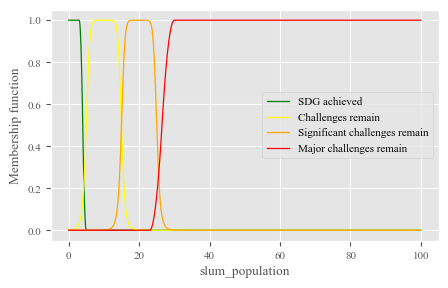

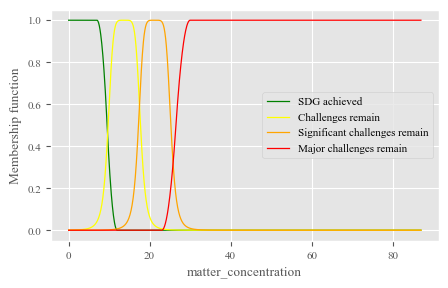

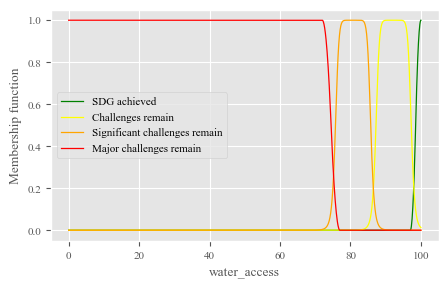

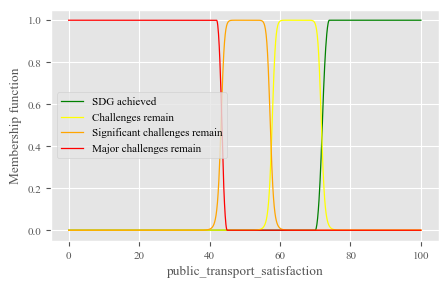

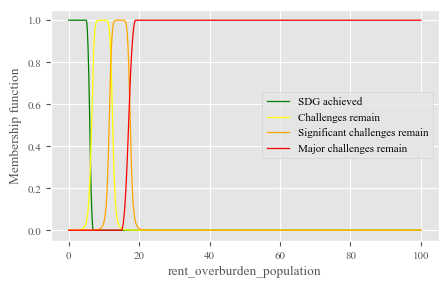

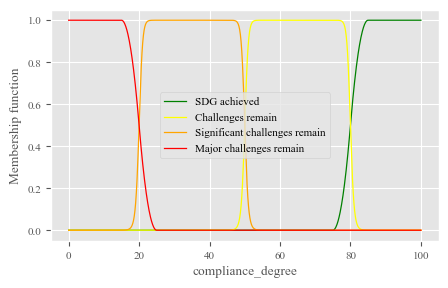

In [4]:
# variable definition
slum_population = zadeh.FuzzyVariable(
    zadeh.FloatDomain("slum_population", 0, 100, 1000),
    {
        'SDG achieved': zadeh.ZFuzzySet(3, 5),
        'Challenges remain': zadeh.BellFuzzySet(5, 5, 10),
        'Significant challenges remain': zadeh.BellFuzzySet(5, 5, 20),
        'Major challenges remain': zadeh.SFuzzySet(23, 30),
    },
)

matter_concentration = zadeh.FuzzyVariable(
    zadeh.FloatDomain("matter_concentration", 0, 87, 1000),
    {
        'SDG achieved': zadeh.ZFuzzySet(7, 12),
        'Challenges remain': zadeh.BellFuzzySet(4, 3, 13.75),
        'Significant challenges remain': zadeh.BellFuzzySet(4, 3, 21.25),
        'Major challenges remain': zadeh.SFuzzySet(23, 30),
    },
)

water_access = zadeh.FuzzyVariable(
    zadeh.FloatDomain("water_access", 0, 100, 1000),
    {
        'SDG achieved': zadeh.SFuzzySet(97, 100),
        'Challenges remain': zadeh.BellFuzzySet(5, 5, 92.25),
        'Significant challenges remain': zadeh.BellFuzzySet(5, 5, 80.75),
        'Major challenges remain': zadeh.ZFuzzySet(72, 77),

    },
)

public_transport_satisfaction = zadeh.FuzzyVariable(
    zadeh.FloatDomain("public_transport_satisfaction", 0, 100, 1000),
    {
        'SDG achieved': zadeh.SFuzzySet(70, 74),
        'Challenges remain': zadeh.BellFuzzySet(7, 7, 64.75),
        'Significant challenges remain': zadeh.BellFuzzySet(7, 7, 50.25),
        'Major challenges remain': zadeh.ZFuzzySet(42, 45),

    },
)

rent_overburden_population = zadeh.FuzzyVariable(
    zadeh.FloatDomain("rent_overburden_population", 0, 100, 1000),
    {
        'SDG achieved': zadeh.ZFuzzySet(5, 7),
        'Challenges remain': zadeh.BellFuzzySet(3, 4, 9.5),
        'Significant challenges remain': zadeh.BellFuzzySet(3, 4, 14.5),
        'Major challenges remain': zadeh.SFuzzySet(15, 19),
    },
)

# OUTPUT
compliance_degree = zadeh.FuzzyVariable(
    zadeh.FloatDomain("compliance_degree", 0, 100, 1000),
    {
        'SDG achieved': zadeh.SFuzzySet(75, 85),
        'Challenges remain': zadeh.BellFuzzySet(15, 15, 65),
        'Significant challenges remain': zadeh.BellFuzzySet(15, 15, 35),
        'Major challenges remain': zadeh.ZFuzzySet(15, 25),

    },
)

# store linguistic variables as a list
INPUTS = [slum_population,
          matter_concentration,
          water_access,
          public_transport_satisfaction,
          rent_overburden_population]


# check fuzzy variables by ploting them
def plot_fuzzy_variable(fuzzy_variable, path):
    """
    Plot a fuzzy variable and save the plot to disk
    """
    plt.figure()
    fuzzy_variable.plot()
    plt.savefig(path)

for fuzzy_variable in INPUTS+[compliance_degree]:
    plot_fuzzy_variable(fuzzy_variable, f'{images_path}/{fuzzy_variable.name}.png')
    plt.show()

## Rules <a class="anchor" id="chapter2_3"></a>

**Step 3. Rule base and inference**

The relationships of the input variables to each other and to the output variable must be established. One simple rule block is defined per variable present in the system plus two additional rules combining multiple variables. Each simple block consists of four rules -one for each interval of values defined in each input variable- and each rule relates each interval of an input variable to an interval of those of the output variable following a relationship of direct proportionality. 

Below we define how to prepare the definition of the variables of the system. Each one is defined as a dictionary where the key is the name of the variable and the value a dictionary with the fields:

- "fuzzy_variable" (zadeh.FuzzyVariable): a fuzzy variable of type input or output
- "reverse" (bool): whether the variable relates proportionally direct or indirect with the output variable
- "weight" (float in (0,1]): a weight associated with each rule measuring its importance relative to the other rules
- "type" (str={"input", "output"}): the type of variable 

The rule set is printed below after the class is instantiated. 

In [5]:
# define fuzzy_variables dict as a dictionary with the fuzzy variable and its weight

fuzzy_variables_sdg_11 = {
    "slum_population": {
        "fuzzy_variable": slum_population,
        "reverse": True,
        "weight": 0.1, 
        "type": "input"
    },
    "matter_concentration": {
        "fuzzy_variable": matter_concentration,
        "reverse": True,
        "weight": 0.1,
        "type": "input"
    },
    "water_access": {
        "fuzzy_variable": water_access,
        "reverse": False,
        "weight": 0.1,
        "type": "input"

    },
    "public_transport_satisfaction": {
            "fuzzy_variable": public_transport_satisfaction,
        "reverse": False,
        "weight": 0.1,
        "type": "input"
    },
    "rent_overburden_population": {
        "fuzzy_variable": rent_overburden_population,
        "reverse": True,
        "weight": 0.1,
        "type": "input"
    },
    "compliance_degree": {
        "fuzzy_variable": compliance_degree,
        "reverse": False,
        "weight": None,
        "type": "output"
    }
}


## Defuzzification <a class="anchor" id="chapter2_4"></a>

**Step 4. Defuzzification**

After evaluating each rule in a fuzzy inference system, a fuzzy set is obtained as output. These outputs are aggregated using the maximum aggregation function (the door is open for the use of other aggregation functions) to produce another fuzzy set. Defuzzification converts this aggregate fuzzy set into a single number by selecting the best possible crisp value. For this, the centroid method has been applied (another methods can be tried too), which gives the value of the centre of area under the curve. 

The output is precisely the degree of compliance with SDG 11 for each country, obtained after combining the values of the input variables collected with the rule base.  

# Build Fuzzy Inference System (FIS) <a class="anchor" id="chapter3"></a>

All this steps are encapsulated into the VariableFIS class. VariableFIS is instantiated by passing a dict with the crisp values of a country for each variable related to the SDG. 

From the exploration phase we saw that only 28 countries (14.51%) have information available for the 5 indicators. The class is able to handle this: if a country has not a value for a variable, another fuzzy logic model with the input variables is build. Missing variables can be omitted in the definition of the dict, set as np.NaN or as None. 

Below is an example for Ireland:

In [6]:
# example of input without all variables

# define crisp inputs for irlanda
IRELAND = {'slum_population': 0,
            'matter_concentration': 7.8,
            'water_access': 97,
            'public_transport_satisfaction': 61,
            'rent_overburden_population': 5.6
}

# instantiate the class with the fuzzy variables of SDG11
vfis = VariableFIS(fuzzy_variables_sdg_11)

# obtain the score for the country
print('Ireland score SDG11:', np.round(vfis(IRELAND), 2))

Ireland score SDG11: 74.8


Now the rules are listed below in a table with the corresponding weights:

In [7]:
# create dataframe with each fuzzy rule: antecedent and consequent and weight
antecedents = []
consequents = []
weights = []

for rule_block in list(vfis.rule_set[:-2]):
    for rule in rule_block:
        antecedents.append(rule.antecedent)
        consequents.append(rule.consequent)
        weights.append(rule.weight)
for rule in vfis.rule_set[-2:]:
    antecedents.append(rule.antecedent)
    consequents.append(rule.consequent)
    weights.append(rule.weight)

rule_df = pd.DataFrame({'antecedent': antecedents, 'consequent': consequents, 'weight': weights})

# add 'If' constant column before antecedent one and 'then' column after it to better reead
rule_df.insert(0, 'If', 'If')
rule_df.insert(2, 'then', 'then')

# show rule set as table
display(rule_df)
# str(vfis.rule_set[0][0].antecedent)

,If,antecedent,then,consequent,weight
0,If,slum_population is SDG achieved,then,compliance_degree is SDG achieved,0.1
1,If,slum_population is Challenges remain,then,compliance_degree is Challenges remain,0.1
2,If,slum_population is Significant challenges remain,then,compliance_degree is Significant challenges re...,0.1
3,If,slum_population is Major challenges remain,then,compliance_degree is Major challenges remain,0.1
4,If,matter_concentration is SDG achieved,then,compliance_degree is SDG achieved,0.1
5,If,matter_concentration is Challenges remain,then,compliance_degree is Challenges remain,0.1
6,If,matter_concentration is Significant challenges...,then,compliance_degree is Significant challenges re...,0.1
7,If,matter_concentration is Major challenges remain,then,compliance_degree is Major challenges remain,0.1
8,If,rent_overburden_population is SDG achieved,then,compliance_degree is SDG achieved,0.1
9,If,rent_overburden_population is Challenges remain,then,compliance_degree is Challenges remain,0.1


## Results <a class="anchor" id="chapter3_1"></a>

The class VariableFIS is used to assign an evaluation to each country.

In [8]:
sdg_11 = pd.read_csv('./data/processed-data/sdg_11.csv')

# rename columns of indicators to match variables
sdg_11.rename(columns={'Proportion of urban population living in slums (%)': 'slum_population',
                          'Annual mean concentration of particulate matter of less than 2.5 microns in diam': 'matter_concentration',
                            'Access to improved water source, piped (% of urban population)': 'water_access',
                            'Satisfaction with public transport (%)': 'public_transport_satisfaction',
                            'Population with rent overburden (%)': 'rent_overburden_population'
                            }, inplace=True)
sdg_11.head()

,Country Code ISO3,Country,Goal 11 Score,Goal 11 Dash,slum_population,matter_concentration,water_access,public_transport_satisfaction,rent_overburden_population
0,AFG,Afghanistan,29.3085,red,73.5,54.950,41.859,34.0,NaN
1,AGO,Angola,47.5600,red,47.0,32.322,59.482,32.0,NaN
2,ALB,Albania,74.4770,orange,13.2,17.541,83.730,48.0,NaN
3,AND,Andorra,NaN,yellow,NaN,11.189,100.000,NaN,NaN
4,ARE,United Arab Emirates,78.0860,yellow,NaN,41.669,NaN,84.0,NaN


In [9]:
def add_crisp_compliance_degree(record, return_linguistic_var=True):
    ''' 
    Add compliance degree to a record using the class VariableFIS
    '''

    record = {k: v for k, v in record.items() if k in fuzzy_variables_sdg_11.keys()}

    # if the number of non nan values in record is less or equal to one, then equal values to grey (=not enough info)
    if ((len([v for v in record.values() if not np.isnan(v)])<=1) or (all(np.isnan(v) for v in record.values()))):
        compliance_degree = np.nan 
        linguistic_var = "grey"
    else:
        vfis = VariableFIS(fuzzy_variables_sdg_11)
        compliance_degree = vfis(record)
        
        # map crisp prediction to linguistic variable
        if compliance_degree <= 20:
            linguistic_var = "red"
        elif compliance_degree <= 50:
            linguistic_var = "orange"
        elif compliance_degree <= 80:
            linguistic_var = "yellow"
        else:
            linguistic_var = "green"
        
    if return_linguistic_var:
        return linguistic_var
    else:
        return compliance_degree

In [10]:
# add fis evaluation for each instance of sdg_11
sdg_11['fis_evaluation'] = sdg_11.apply(lambda x: add_crisp_compliance_degree(x.to_dict(), return_linguistic_var=False), axis=1)

# order sdg_11 by decreasing fis_evaluation
sdg_11.sort_values(by='fis_evaluation', ascending=False, inplace=True)

# print best ranked countries
print('Best ranked countries by FIS:')
best_ranked_sdg11 = sdg_11.head(5)[['Country', 'fis_evaluation']].reset_index(drop=True)
display(best_ranked_sdg11)

# drop rows with nan in fis_evaluation col
sdg_11.dropna(subset=['fis_evaluation'], inplace=True)

# print worst ranked countries
print('Worst ranked countries by FIS:')
worst_ranked_sdg11 = sdg_11.tail(5)[['Country', 'fis_evaluation']].reset_index(drop=True)
display(worst_ranked_sdg11)

Best ranked countries by FIS:


,Country,fis_evaluation
0,Brunei Darussalam,89.771521
1,Tonga,83.243747
2,Tuvalu,82.202101
3,Andorra,75.114440
4,Netherlands,74.950110


Worst ranked countries by FIS:


,Country,fis_evaluation
0,Togo,10.079317
1,South Sudan,10.079023
2,Afghanistan,10.078950
3,Equatorial Guinea,10.078915
4,Central African Republic,10.078911


## Comparison <a class="anchor" id="chapter3_2"></a>

The results obtained with the Fuzzy Inference Systems can be compared with the ones in the SDReport by means of the colours assigned to each country. Since the methods of evaluation are completely different, the results are expected to differ too. 

In [11]:
# compare fis_color and goal 11 dash
sdg_11['fis_color'] = sdg_11.apply(lambda x: add_crisp_compliance_degree(x.to_dict(), return_linguistic_var=True), axis=1)

comparison = sdg_11[['Country', 'fis_color', 'Goal 11 Dash']].dropna()
# select instances for which the string value in fis_color and goal 11 dash are different
comparison = comparison.loc[~(comparison['fis_color'] == comparison['Goal 11 Dash'])]

# print percentage too
print("Number of instances where fis_color and goal 11 dash are different: ", len(comparison), f"({np.round(len(comparison)/len(sdg_11)*100, 2)})%")
print("Number of total instances:", len(sdg_11))
comparison

Number of instances where fis_color and goal 11 dash are different:  43 (23.76)%
Number of total instances: 181


,Country,fis_color,Goal 11 Dash
173,Tonga,green,yellow
177,Tuvalu,green,yellow
161,Slovak Republic,yellow,orange
140,Poland,yellow,orange
31,Chile,yellow,orange
101,Sri Lanka,yellow,orange
42,Cyprus,yellow,orange
160,Suriname,yellow,orange
111,Mexico,yellow,orange
21,Belize,yellow,orange


The above colour differences are within the normal range, in the sense that adjacent colours are 'blending'. 

# Summary <a class="anchor" id="summary"></a>

- We followed a fuzzy logic modeling approach to reinterpret the data and define a new system to evaluate SDGs. 
- A model is built dinamically after knowing the available indicators for a country. The system uses these as input variables. 
- As a consequence of missing data, eight models are built (see exploration for further information).
- After applying this method, the best and worst ranked countries are, respectively:
  - Brunei Darussalam, Tonga, Tuvalu, Andorra and Netherlands
  - Togo, South Sudan, Afghanistan, Equatorial Guinea and Central African Republic

# Session info <a class="anchor" id="session_info"></a>

In [12]:
import session_info
session_info.show(html=False)

-----
VariableFIS         NA
matplotlib          3.6.2
numpy               1.23.4
pandas              1.5.1
session_info        1.0.0
zadeh               0.3.0
-----
IPython             8.6.0
jupyter_client      7.4.4
jupyter_core        4.11.2
-----
Python 3.8.10 (tags/v3.8.10:3d8993a, May  3 2021, 11:48:03) [MSC v.1928 64 bit (AMD64)]
Windows-10-10.0.22000-SP0
-----
Session information updated at 2022-11-11 14:18
